# Capstone Project II: US Arrest dataset.

Import all the libraries

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA




### Load the Data set UsArrests.csv

Call the head() function to take a look at what we have got. 

We can see the first column is city and this is actually US states not cities. we can fix that.

In [2]:
df = pd.read_csv("UsArrests.csv").copy()
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.rename(columns={'City': 'State'}, inplace=True)

df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
# Making Urban Names İndex
df.index = df.iloc[:,0]

In [5]:
df= df.iloc[:,1:5]

In [6]:
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


info() will alow us to see what type of data we are dealing with. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


isnull().sum() will give us the summ of each column if the column has null values, from this we can see we have a good clean data set. 

In [8]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

for a little extra info to help us make correct decisions, we will call describe().T

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


To get some more insight into the spread of the data lets plots some Histograms. 

array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

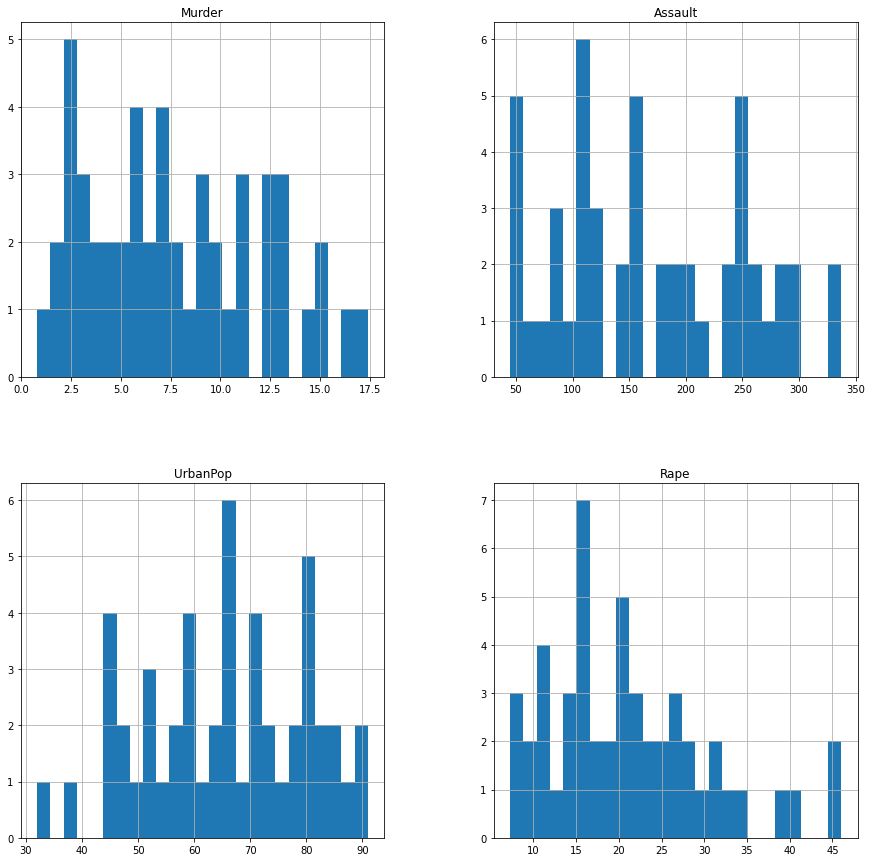

In [10]:
df.hist(bins= 25, figsize=(15,15))

A Correclation Analisys will help us draw some connections between the Data.

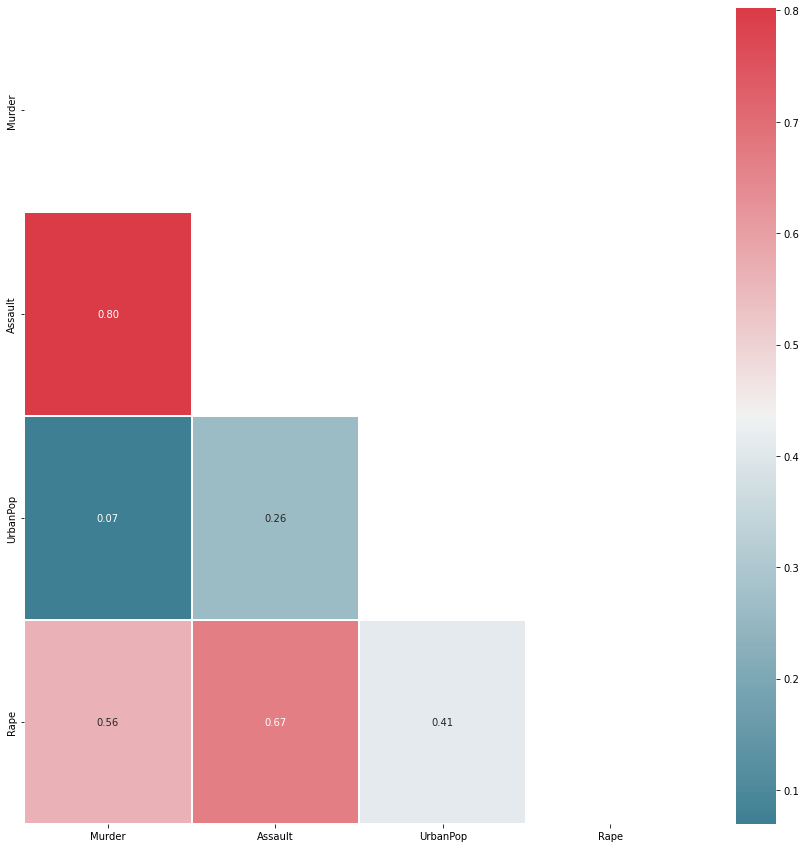

In [11]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(15, 15))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(df)

### From the plot above, most of the variables are highly positively or negatively correlated with each other. We can see that Assault seems to be the directly correlated to Murder and Rape.

# We can now start the process of doing PCA (Principal Components Analysis)

In [16]:
# select and standardize features
X = StandardScaler().fit_transform(df.values)

# choose number of components to be generated
nr_comps = 4
pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(X)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index=df.index)

# This is to include the country code  as the rownames in the PC's
pca_df.head()

,0,1,2,3
State,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


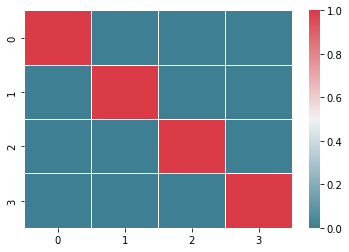

In [17]:
ax = sns.heatmap(pca_df.corr(), cmap=colormap,linewidth=1)
plt.show()

## Interpreting the PCA 

We can access the correlations between the components and original variables using the components_ method of our PCA() object.


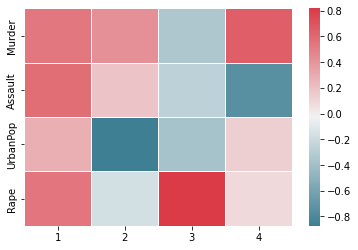

In [18]:
components = pd.DataFrame(pca.components_, columns=df.columns, index=range(1, nr_comps+1)).transpose()
ax = sns.heatmap(components,cmap=colormap,linewidth=1)
plt.show()

# We can now take a look at some clustering techniques 

## Model

In [22]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [33]:
kmeans = KMeans(n_clusters=4)

In [34]:
print(kmeans) # n_clusters: Cluster Numbers - n_init: Center Names(How many times will we fit?)

KMeans(n_clusters=4)


In [35]:
k_fit= kmeans.fit(df)

In [36]:
k_fit.n_clusters

4

In [ ]:
# Centers of Clusters for each feature
k_fit.cluster_centers_

In [37]:
# Which State in which class
k_fit.labels_

array([1, 1, 1, 0, 1, 0, 3, 1, 1, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1, 0, 1,
       2, 1, 0, 3, 3, 1, 2, 0, 1, 1, 1, 2, 3, 0, 0, 3, 0, 1, 2, 0, 0, 3,
       2, 0, 0, 2, 2, 0], dtype=int32)

# Visualisation 

In [38]:
kmeans= KMeans(n_clusters=2)
k_fit = kmeans.fit(df)

In [39]:
clusters = k_fit.labels_

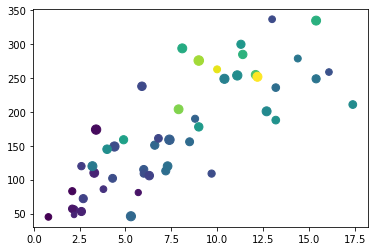

In [40]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],df.iloc[:,3],)

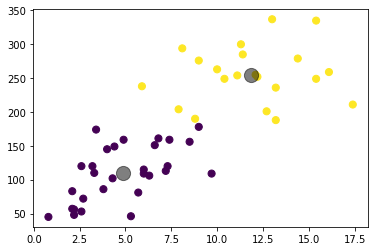

In [41]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=clusters,s=50,cmap="viridis") # First 2 feature
centers = k_fit.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="black",s = 200,alpha=0.5)

# Clusters and Observations

In [42]:
kmeans= KMeans(n_clusters=4)
k_fit =kmeans.fit(df)
clusters= k_fit.labels_

In [43]:
pd.DataFrame({"Urbans": df.index,"Clusters": clusters})[:10]

,Urbans,Clusters
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,3
4,California,1
5,Colorado,3
6,Connecticut,2
7,Delaware,1
8,Florida,1
9,Georgia,3


In [44]:
## Adding to DF
df["Clusters"] = clusters
df.head()

,Murder,Assault,UrbanPop,Rape,Clusters
State,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1


In [45]:
df.Clusters.unique()

array([1, 3, 2, 0], dtype=int32)

In [46]:
df["Clusters"]=df["Clusters"]+1

In [47]:
df.head(10)

,Murder,Assault,UrbanPop,Rape,Clusters
State,,,,,
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,4
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,4
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,2


# Hierachical clustering

In [48]:
# Select useful features
X = df[['Murder','Assault']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

# Select K
K = 5

Data size:
(50, 2)


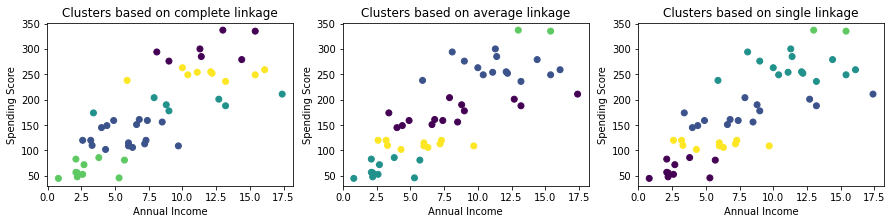

In [49]:
plt.figure(figsize=[15,3])

linkage_types = ['complete', 'average', 'single']

for i, l in enumerate(linkage_types):
  plt.subplot(1, 3, i+1)
  
  cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=l)
  cluster.fit_predict(X)

  ax = plt.scatter(X[:,0], X[:,1], c=cluster.labels_)
  
  plt.title('Clusters based on {} linkage'.format(l))
  plt.xlabel('Annual Income')
  plt.ylabel('Spending Score')
 
L = 'complete'

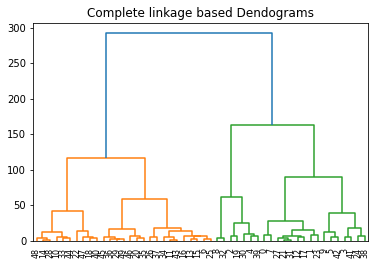

In [50]:
plt.title("Complete linkage based Dendograms")  
dend = dendrogram(linkage(X, method='complete'))  

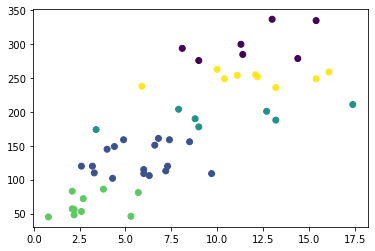

In [51]:
cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=L)
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_)

# Interpretation and Summary od Data set.

### From the above we can confirm our Initial statement that Assault is directly coorelated to Murder and also to Rape. As we see in the graph above, both our data go in a upwards trajectory with minimal outliers. 